In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
rating_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"
rating_df = pd.read_csv(rating_url)
rating_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [37]:
sum( rating_df["rating"] == 2 ), sum( rating_df["rating"] == 3 )

(10976, 222330)

In [5]:
dataset = rating_df.pivot(index="user",columns="item", values="rating").reset_index().fillna(0.0)
dataset

item,user,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
0,2,0.0,3.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,...,0.0,2.0,0.0,3.0,0.0,2.0,2.0,0.0,3.0,0.0
1,4,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,...,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0
2,5,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,2102054,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33897,2102356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33898,2102680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33899,2102983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
melted = pd.melt(dataset, id_vars=dataset.columns[:1], value_vars=dataset.columns[1:], value_name="rating" )

melted

,user,item,rating
0,2,AI0111EN,0.0
1,4,AI0111EN,0.0
2,5,AI0111EN,2.0
3,7,AI0111EN,0.0
4,8,AI0111EN,0.0
...,...,...,...
4271521,2102054,WA0103EN,0.0
4271522,2102356,WA0103EN,0.0
4271523,2102680,WA0103EN,0.0
4271524,2102983,WA0103EN,0.0


In [7]:
a = melted["rating"]


sum(a==0), sum(a==2), sum(a==3)


(4038220, 10976, 222330)

In [8]:
zeros = melted[ melted["rating"]==0 ]

zeros = zeros.sample(n=300000)


zeros

,user,item,rating
4245701,665885,WA0103EN,0.0
1710388,981289,DB0151EN,0.0
2635425,1430303,LB0105ENv1,0.0
2914453,1981804,ML0111EN,0.0
2054737,1183910,DS0201EN,0.0
...,...,...,...
1598521,511442,DB0111EN,0.0
1637639,725010,DB0113EN,0.0
1641626,943707,DB0113EN,0.0
959191,718546,CC0103EN,0.0


In [9]:
save = pd.concat( [ rating_df, zeros ] ).sort_values("user").reset_index()
save = save.drop("index", axis=1)
save

,user,item,rating
0,2,BD0221EN,3.0
1,2,LB0107ENv1,3.0
2,2,SC0105EN,2.0
3,2,CO0201EN,0.0
4,2,BD0123EN,2.0
...,...,...,...
533301,2103039,CB0101EN,0.0
533302,2103039,CL0101EN,0.0
533303,2103039,PY0101EN,0.0
533304,2103039,DS0201EN,0.0


In [10]:
save.to_csv("nice_data.csv",index=False)

In [14]:
y = save.iloc[:, -1]
for x in [0,2,3]:
    print(x , mean_squared_error(y,  np.ones( len(y) )*x, squared=False) )

0 1.9581458729323662
2 1.633096884458633
3 2.254626470438443


In [22]:

test = np.random.randint(0,3,save.shape[0])
test[ test==1 ] = 3
mean_squared_error(y,  test, squared=False)

1.9654052939332725

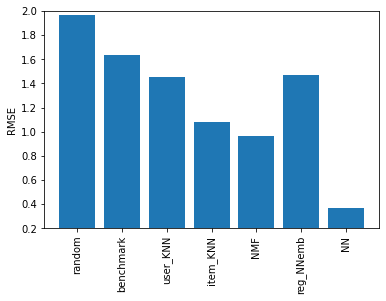

In [39]:
labels = [ "random", "benchmark","user_KNN", "item_KNN","NMF", "reg_NNemb", "NN"  ]
rmses  = [ 1.965,1.633, 1.454, 1.078,0.966, 1.466, 0.365  ]

plt.bar( labels, rmses )
plt.xticks(rotation=90)
plt.ylim(.2,2.0)
plt.ylabel("RMSE")
plt.savefig( "overview.png", bbox_inches="tight" )